# **Projecto Final**

*Aprendizaje Automatico*

*   *Juan Pablo Fernández Delgado*

## Healthcare Dataset Stroke Data 


---
Nota: subir el archivo train_2v.csv y test_2v.csv
fuente: Kaggle
https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data

**Descripción detallada de los datos e instrucciones**


*   Predecir si un paciente tendrá un accidente cerebrovascular o no basado en los atributos que se les realizo un analisis exploratorio.














Variable | Definicion | Clasificacion
--- | --- | ---
Id | Patient ID | Nada
Gender | Gender of Patient | One hot encoding
Age | Age of Patient | One hot encoding
Hypertension | 0 - no hypertension, 1 - suffering from hypertension | Nada
Heart_diseas | 0 - no heart disease, 1 - suffering from heart disease | Nada
Ever_married | Yes/No | One hot encoding
Work_type | Type of occupation | One hot encoding
Residence_type | Area type of residence (Urban/ Rural) | One hot encoding
Avg_glucose_level | Average Glucose Level (measured after meal) | One hot encoding, Normalización
bmi | Body mass index | One hot encoding, Normalización, N/As
Smoking_status | Patient's smoking status | One hot encoding, N/As
Stroke | 0 - no stroke, 1 - suffered stroke | Dato a predecir


Nota: Las clasificaciones se detallan en la columna de clasificación de la variable. Nada: es que se dejó el valor igual a como viene, One hot encoding para las características categóricas, N/As Nomenclatura utilizada cuando hay datos faltantes y la Normalización ( x – min(x) ) / ( max(x) – min(x) ).

In [0]:
# Se importan las librerías
import numpy as np
import pandas as pd
# Librería  para graficar
import matplotlib.pylab as plt
%matplotlib inline
# Librería  método regresión lineal
from sklearn.linear_model import LinearRegression
# Librería método Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Librería método regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
# Librería método KMeans
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
import seaborn as sns
from scipy.linalg import solve
%matplotlib inline



In [0]:
# Lectura del set de datos con la libreria pandas, se leen ambas fuentes, tanto el train como el test y 
# luego le hacemos un join, para obtener el conjunto de datos completo y es con el que vamos hacer las predicciones.
#data = pd.read_csv('train_2v.csv')

train_data= pd.read_csv("train_2v.csv")
test_data=pd.read_csv("test_2v.csv")

In [3]:
# Realizamos un head de la funcion pandas al set de datos para ver los datos que tenemos.
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# Describimos el set de datos
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
# Obtenemos las columnas del set de datos.
train_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [97]:
print("Forma del set de datos : {}" .format(train_data.shape))

Forma del set de datos : (43400, 12)


# Preprocesamiento, extraccion de caracteristicas y Evaluación 


1.	Procesamiento de datos (Normalización y Estandarización)
2.	Unión del set de datos del training y test
3.	Realizamos un análisis como están los datos antes de procesar, histograma.
4.	Categorismos los datos (One hot encoding)
5.	Realizamos un análisis completo con los datos procesados (EDA).
6.	Dividimos el set de datos.
7.	Métodos a predecir(Regresión Lineal, Regresión Logística, Árbol de Decisión, Randown Forest), para algnos casos se utiliza kfolds y ROC.

In [8]:
# Procesamiento de los datos
((train_data.isnull().sum()/len(train_data))*100).sort_values(ascending=False)

smoking_status       30.626728
bmi                   3.368664
stroke                0.000000
avg_glucose_level     0.000000
Residence_type        0.000000
work_type             0.000000
ever_married          0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
id                    0.000000
dtype: float64

In [9]:

((test_data.isnull().sum()/len(test_data))*100).sort_values(ascending=False)


smoking_status       30.917693
bmi                   3.177249
avg_glucose_level     0.000000
Residence_type        0.000000
work_type             0.000000
ever_married          0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
id                    0.000000
dtype: float64

In [10]:
# Unimos el conjunto de datos del training y el test
joined_data=pd.concat([train_data,test_data])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
print("Union de ambos set de datos : {}" .format(joined_data.shape))

Union de ambos set de datos : (62001, 12)


In [0]:
a=((joined_data.isnull().sum()/len(joined_data))*100).sort_values(ascending=False)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


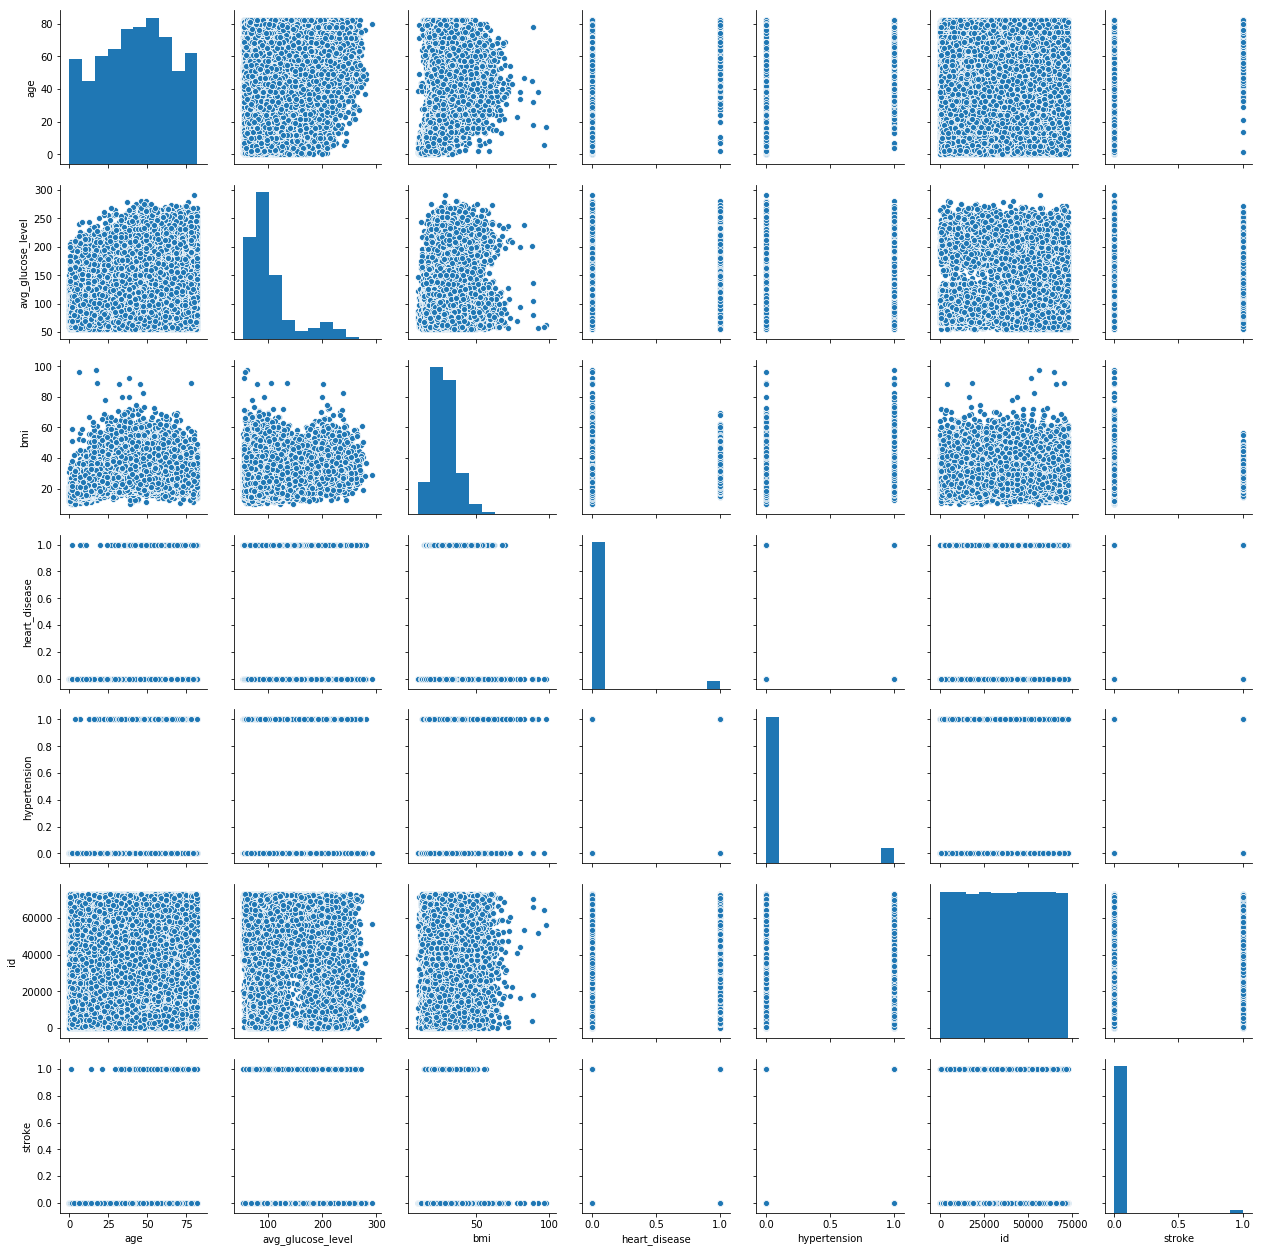

In [13]:
# Hacemos un Analis de los datos con un histograma antes del procesamiento de los datos.
sns.pairplot(joined_data)

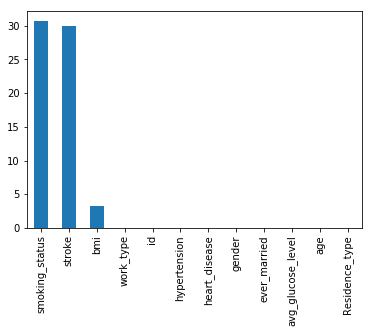

In [14]:
# Vemos el comportamientos de los datos en un grafico.
a.plot.bar()
plt.show()

In [0]:
# Vamos eliminar los valores nulos o nan de la columna bmi, con la media.
train_data['bmi']=train_data.bmi.fillna(train_data.bmi.mean())

In [16]:
((train_data.isnull().sum()/len(train_data))*100).sort_values(ascending=False)

smoking_status       30.626728
stroke                0.000000
bmi                   0.000000
avg_glucose_level     0.000000
Residence_type        0.000000
work_type             0.000000
ever_married          0.000000
heart_disease         0.000000
hypertension          0.000000
age                   0.000000
gender                0.000000
id                    0.000000
dtype: float64

In [17]:
# El siguiente método muestra como procesar las variables categóricas
for i in train_data.select_dtypes(exclude=['int','float']).columns:
    print('*******',i,'******') 
    print(train_data[i].value_counts())
    print('*'*30)
    print()

******* gender ******
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64
******************************

******* ever_married ******
Yes    27938
No     15462
Name: ever_married, dtype: int64
******************************

******* work_type ******
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64
******************************

******* Residence_type ******
Urban    21756
Rural    21644
Name: Residence_type, dtype: int64
******************************

******* smoking_status ******
never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64
******************************



In [0]:
#Vamos a deshacernos de estas variables categóricas, para poderlas interpretar.

In [0]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [20]:
# Creamos una copia del set de datos original
train_data_orignal=train_data.copy()
train_data_orignal.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [0]:
# Transformamos las variables categóricas con one hot encoding

train_data['gender']=le.fit_transform(train_data['gender'])
train_data['ever_married'] = le.fit_transform(train_data['ever_married'])
train_data['work_type']= le.fit_transform(train_data['work_type'])
train_data['Residence_type']= le.fit_transform(train_data['Residence_type'])

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null int64
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null int64
work_type            43400 non-null int64
Residence_type       43400 non-null int64
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 4.0+ MB


Creamos dos set de datos, uno con variables con smoke status y otras sin smoke status.

In [0]:
# Creamos una variable sin smoke status, para lo que son las predicciones
train_data_without_smoke=train_data[train_data.smoking_status.isnull()]

In [0]:
# Creamos una variable con smoke status
train_data_with_smoke=train_data[train_data.smoking_status.notnull()]

In [25]:
train_data_without_smoke.drop('smoking_status',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
print("Datos con la forma de la variable smoke: {}".format(train_data_with_smoke.shape))
print("Datos sin la forma de la variable smoke: {}".format(train_data_without_smoke.shape))

Datos con la forma de la variable smoke: (30108, 12)
Datos sin la forma de la variable smoke: (13292, 11)


In [27]:

train_data_without_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0
5,32257,0,47.0,0,0,1,2,1,210.95,50.1,0
10,10460,0,79.0,0,0,1,0,1,77.08,35.0,0


In [28]:
train_data_with_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,never smoked,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,formerly smoked,0
6,52800,0,52.0,0,0,1,2,1,77.59,17.7,formerly smoked,0
7,41413,0,75.0,0,1,1,3,0,243.53,27.0,never smoked,0
8,15266,0,32.0,0,0,1,2,0,77.67,32.3,smokes,0


In [29]:
# Se aplica onehoteconding a la variable smoke status, para categorizarla
train_data_with_smoke.smoking_status=le.fit_transform(train_data_with_smoke.smoking_status)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## **Analisis Exploratorio de los Datos**
Vamos a realiar un analisis de los datos, a como vienen los datos directo del dataset, sin antes hacer le una salo modificacion, usaremos pairplot de seabor para mostrar los graficos .

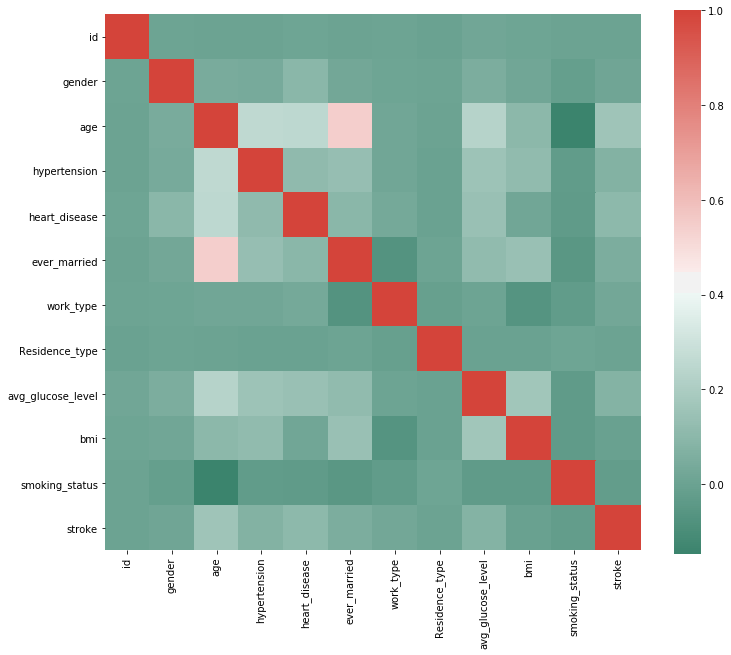

In [30]:
# Usaremos la libreria de seaborn para hacer un heatmap del conjunto de datos, y analizarlos.
f,ax=plt.subplots(figsize=(12,10))

corr=train_data_with_smoke.corr()

sns.heatmap(train_data_with_smoke.corr(),mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(520,14,as_cmap=True),square=True, ax=ax)

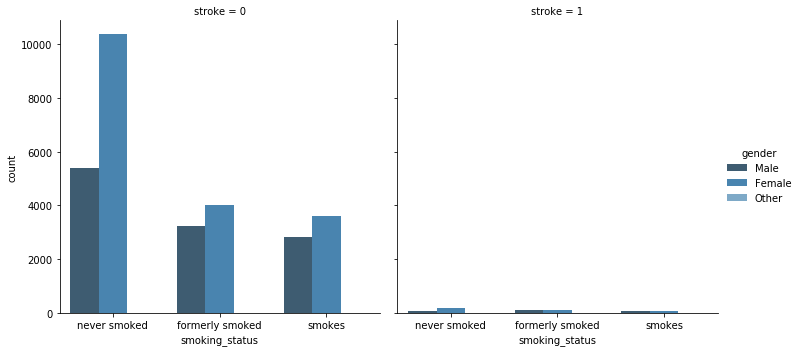

In [31]:
sns.catplot(x='smoking_status',kind='count',col='stroke',
            hue='gender',data=train_data_orignal,palette="Blues_d")

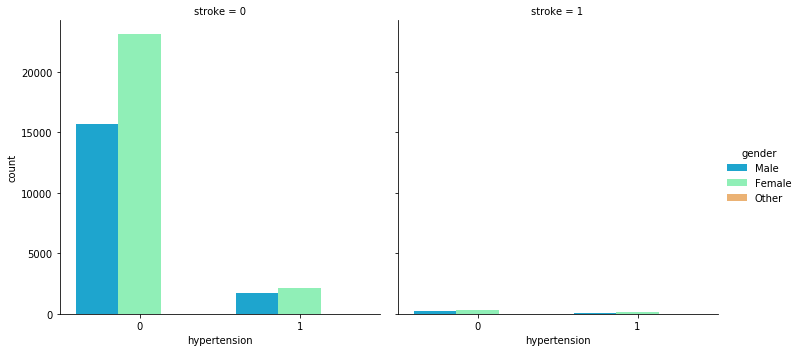

In [32]:
sns.catplot(x='hypertension',kind='count',col='stroke',
            hue='gender',data=train_data_orignal,palette="rainbow")

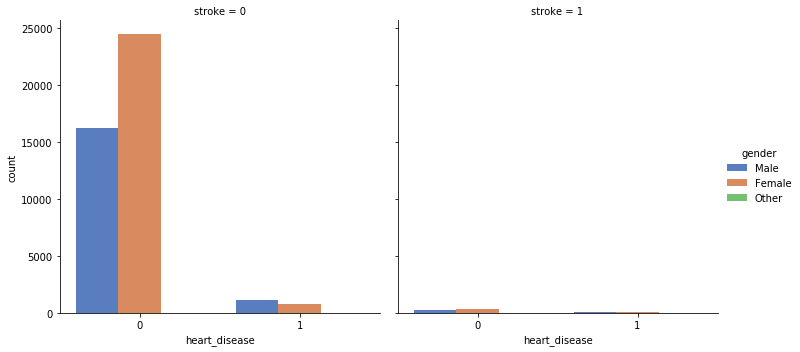

In [33]:
sns.catplot(x='heart_disease',kind='count',col='stroke',
            hue='gender',data=train_data_orignal,palette="muted")

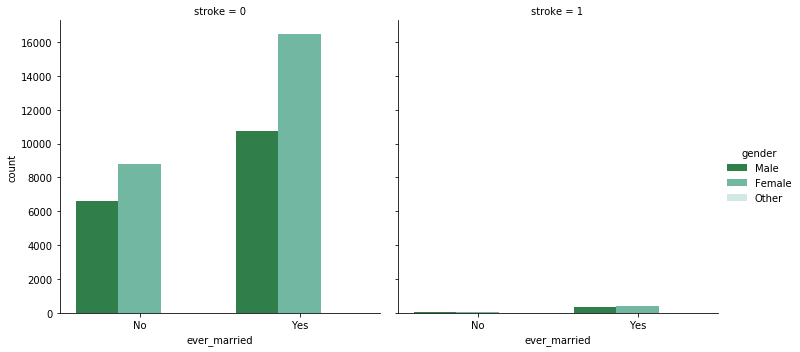

In [34]:
sns.catplot(x='ever_married',kind='count',col='stroke',
            hue='gender',data=train_data_orignal,palette="BuGn_r")

In [35]:
# Manejo de datos faltantes
train_data_with_smoke['stroke'].value_counts()

0    29470
1      638
Name: stroke, dtype: int64

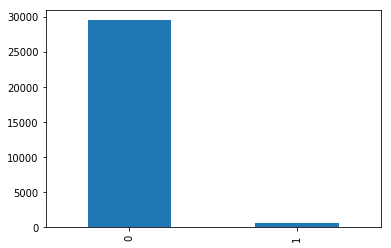

In [36]:
train_data_with_smoke['stroke'].value_counts().plot.bar()

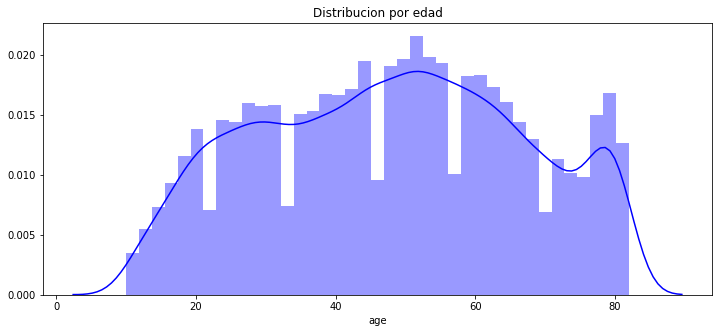

In [37]:
# Hacemos una distribución por edad
plt.figure(figsize=(12,5))
plt.title("Distribución por edad")
sns.distplot(train_data_with_smoke['age'],color='B')

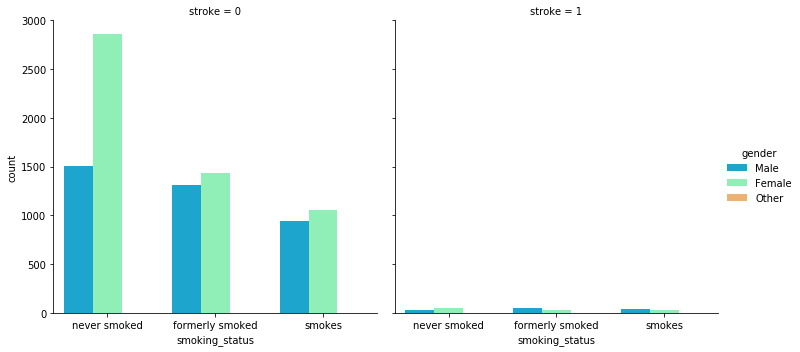

In [38]:
# Exploramos la variable de edad por rangos
sns.catplot(x='smoking_status',kind='count',col='stroke',
            data=train_data_orignal[(train_data_orignal['age']>50) &                                                                             
                                    (train_data_orignal['age']<70)],palette='rainbow',hue='gender')

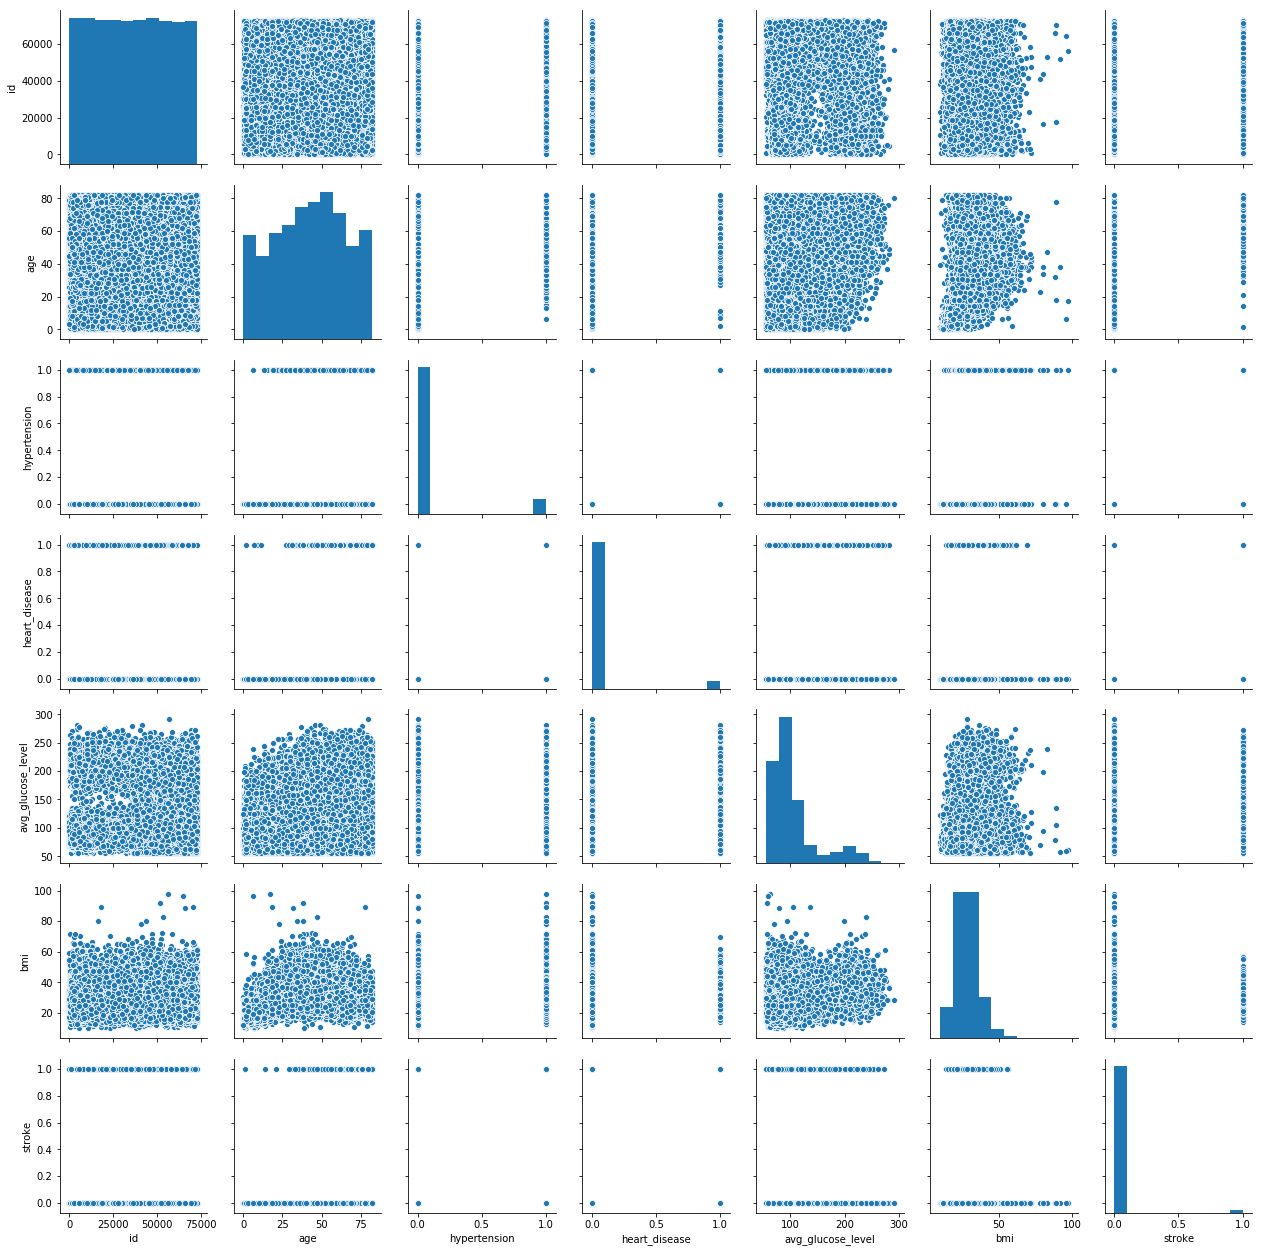

In [39]:
# Realizamos un histograma con el set de datos procesado
sns.pairplot(train_data_orignal)

In [40]:
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
ros=RandomOverSampler(random_state=0)
smote=SMOTE()

In [0]:
x_resampled,y_resampled =ros.fit_resample(
    train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'],train_data_with_smoke['stroke'])

In [43]:
print("ROS Shape Of Train Data With Smoke(Independent varriable) :   {}".format(x_resampled.shape))
print("ROS Shape Of Train Data With Smoke(dependent varriable) :   {}".format(y_resampled.shape))

ROS Shape Of Train Data With Smoke(Independent varriable) :   (58940, 11)
ROS Shape Of Train Data With Smoke(dependent varriable) :   (58940,)


In [0]:
x_resampled_1,y_resampled_1=ros.fit_resample(
    train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'],
    train_data_without_smoke['stroke'])

In [45]:
print("ROS Shape Of Train Data Without Smoke(Independent varriable) :   {}".format(x_resampled_1.shape))
print("ROS Shape Of Train Data Without Smoke(dependent varriable) :   {}".format(y_resampled_1.shape))

ROS Shape Of Train Data Without Smoke(Independent varriable) :   (26294, 10)
ROS Shape Of Train Data Without Smoke(dependent varriable) :   (26294,)


## **Divicion del set de datos**


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
validation_size = 0.20
seed = 7



In [48]:
X_train,X_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=validation_size,random_state=seed)
print(X_train.shape)
print(X_test.shape)

(47152, 11)
(11788, 11)


In [49]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(x_resampled_1,y_resampled_1,test_size=validation_size,random_state=seed)
print(X_train_1.shape)
print(X_test_1.shape)

(21035, 10)
(5259, 10)


## **Creacion de modelos**

### **Método de Regresión Lineal**

In [50]:
# Modelo de regrecion lineal
ln = LinearRegression()
# usa el entrenamiento
ln.fit(X_train, y_train)
# revisa el score
ln.score(X_train, y_train)

0.3345669984678503

In [51]:
ln.coef_ # Obtiene el coeficiente, beta

array([ 5.13794098e-07,  1.36159316e-02,  1.36658136e-02,  7.81134219e-02,
        1.21171504e-01, -5.57484740e-02,  1.50649654e-02,  1.45691205e-02,
        8.04956059e-04, -1.66462436e-03,  6.69000255e-03])

In [52]:
ln.intercept_ # Obtiene la intercepción, c

-0.3907800482757602

In [0]:
# Predicción 
lnPredict = ln.predict(X_train) 

In [54]:
lnPredict

array([0.58120311, 0.80781543, 0.18525702, ..., 0.1394684 , 0.66949654,
       0.54378519])

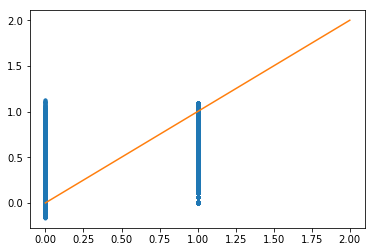

In [55]:
# Grafico de la prediccion y la info actual
plt.plot(y_train, lnPredict, '.')

# Linea grafica
x = np.linspace(0, 2, 2)
y = x
plt.plot(x, y)
plt.show()

Dato al conjunto de datos y su complejidad esta funcion se le ve relevancia, para tomar deciciones, para este caso.

### **Método de Regresión Logística**

### **Clasificación de Regresión logística con el set de datos de Smoking Status**

In [0]:
# Usamos el metodo de kfolds y le hacemos un split de 10 segmentos.
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1

In [57]:
# Aplicamos el metodo Kfolds para la prediccion.

for train_index,test_index in kf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7532879265986405
2 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7479773350011647
3 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7628646170088209
4 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7651637601020842
5 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.756225345300736
6 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7665973222324661
7 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7549808700045558
8 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7644705676599438
9 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7623182849119775
10 of KFold 10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ROC AUC score: 0.7595548475357309


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.77      0.72      0.74      5962
           1       0.73      0.79      0.76      5826

    accuracy                           0.75     11788
   macro avg       0.75      0.75      0.75     11788
weighted avg       0.75      0.75      0.75     11788

0.750678656260604
[[4267 1695]
 [1244 4582]]
precision =  0.7299665445276405 
 recall =  0.7864744249914177


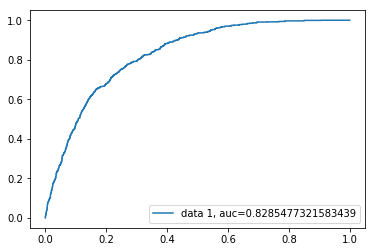

                   Importance
heart_disease        0.689866
hypertension         0.415351
age                  0.070660
Residence_type       0.060678
gender               0.055745
smoking_status       0.039616
work_type            0.012856
avg_glucose_level    0.003979
id                   0.000002
bmi                 -0.014103
ever_married        -0.137176


In [58]:
# Realizamos una Regresión logística, con la importancia de los datos y el ajuste de la curva Roc para ver su tendencia.

log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
impFeatures = pd.DataFrame(log.coef_[0] ,
                           index=train_data_with_smoke.loc[:,
                                                           train_data_with_smoke.columns!='stroke'].columns,
                           columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

Se puede detallar que con el metodo kfolds y sin kfolds la prediccion da muy parecida, tendiendo a 0.7 por ahi.

Se realiza un Regresión logística con el set de datos que no tiene Smoking Status.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2601
           1       0.80      0.89      0.84      2658

    accuracy                           0.83      5259
   macro avg       0.83      0.83      0.83      5259
weighted avg       0.83      0.83      0.83      5259

0.829435253850542
[[2007  594]
 [ 303 2355]]
precision =  0.7985757884028484 
 recall =  0.8860045146726863


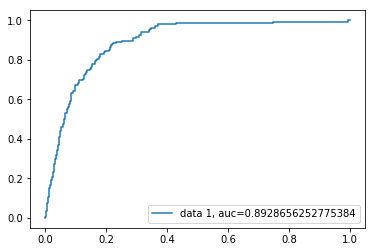

                     Importance
heart_disease      9.102383e-01
gender             4.370013e-01
Residence_type     9.838414e-02
ever_married       8.297115e-02
age                7.120758e-02
avg_glucose_level  2.800449e-03
id                 9.457413e-07
bmi               -1.251164e-02
work_type         -1.267270e-02
hypertension      -1.662091e-02


In [59]:
# Realizamos una Regresión logística, con la importancia de los datos y el ajuste de la curva Roc para ver su tendencia.
logg = LogisticRegression(penalty='l2', C=0.1)
logg.fit(X_train_1,y_train_1)

pred = logg.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = logg.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(logg.coef_[0] ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

### **Método de Árbol de Decisión**

### **Árbol de decisión con el set de datos de Smoking Status**

In [0]:
# Usamos el metodo de kfolds y le hacemos un split de 10 segmentos.
kft = StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1

In [88]:
# Aplicamos el metodo Kfolds para la prediccion.

for train_index,test_index in kf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,kft.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    
    #model
    dtree = DecisionTreeClassifier()
    dtree.fit(xtr,ytr)
    score = roc_auc_score(yvl,dtree.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1
    
    

11 of KFold 10
ROC AUC score: 0.9851127179923437
12 of KFold 10
ROC AUC score: 0.9876648234793705
13 of KFold 10
ROC AUC score: 0.9870267971076138
14 of KFold 10
ROC AUC score: 0.9866014461931093
15 of KFold 10
ROC AUC score: 0.9861760952786048
16 of KFold 10
ROC AUC score: 0.9878774989366227
17 of KFold 10
ROC AUC score: 0.9878774989366227
18 of KFold 10
ROC AUC score: 0.9855380689068481
19 of KFold 10
ROC AUC score: 0.9848936170212765
20 of KFold 10
ROC AUC score: 0.9863829787234042


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5962
           1       0.98      1.00      0.99      5826

    accuracy                           0.99     11788
   macro avg       0.99      0.99      0.99     11788
weighted avg       0.99      0.99      0.99     11788

0.9888021717000339
[[5830  132]
 [   0 5826]]
precision =  0.9778449144008057 
 recall =  1.0


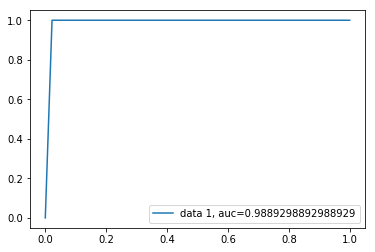

                   Importance
age                  0.377112
avg_glucose_level    0.186411
id                   0.176947
bmi                  0.144010
smoking_status       0.025273
work_type            0.020078
Residence_type       0.017010
heart_disease        0.016043
gender               0.014742
hypertension         0.012388
ever_married         0.009986


In [62]:
# Realizamos una preduccion con arbol de desicion, con la importancia de los datos y el ajuste de la curva Roc para ver su tendencia.
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=train_data_with_smoke.loc[:,train_data_with_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

Se puede detallar que con el metodo kfolds y sin kfolds la prediccion da muy parecida, tendiendo a 0.9 o superior.

Se realiza un árbol de decisión con las variables que no con contienen Smoking Status.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2601
           1       0.99      1.00      1.00      2658

    accuracy                           1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259

Accuracy: 0.9960068454078722
COnfusion Matrix: 
 [[2580   21]
 [   0 2658]]
precision =  0.9921612541993281 
 recall =  1.0


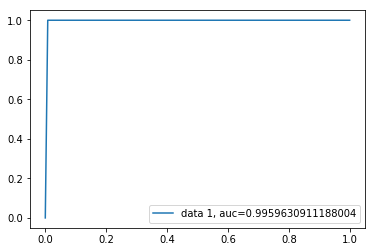

                   Importance
age                  0.558774
bmi                  0.145287
avg_glucose_level    0.118586
id                   0.107594
work_type            0.024960
ever_married         0.017024
gender               0.012869
Residence_type       0.009271
hypertension         0.004032
heart_disease        0.001604


In [63]:
# Realizamos una preduccion con arbol de desicion, 
# con la importancia de los datos y el ajuste de la curva Roc para ver su tendencia.
dtree_nosmoke = DecisionTreeClassifier()
dtree_nosmoke.fit(X_train_1,y_train_1)

pred = dtree_nosmoke.predict(X_test_1)
print(classification_report(y_test_1,pred))
print ('Accuracy: {}'.format(accuracy_score(y_test_1,pred)))
print ('COnfusion Matrix: \n {}'.format(confusion_matrix(y_test_1,pred)))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = dtree_nosmoke.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

impFeatures = pd.DataFrame(dtree_nosmoke.feature_importances_ ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

### **Metodo de Random Forest**

Aplicamos en metodo de Random Forest con variables de Smoking Status

In [0]:
# Usamos el metodo de kfolds y le hacemos un split de 10 segmentos.
kff = StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1

In [89]:
# Aplicamos el metodo Kfolds para la prediccion.
for train_index,test_index in kff.split(X_train,y_train):
    print('{} of KFold {}'.format(i,kff.n_splits))
    xtr,xvl = X_train[train_index],X_train[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    
    #model
    ran = RandomForestClassifier(n_estimators=50,random_state=0)
    ran.fit(xtr,ytr)

    score = roc_auc_score(yvl,ran.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

21 of KFold 10
ROC AUC score: 0.9991492981709911
22 of KFold 10
ROC AUC score: 0.9985112717992344
23 of KFold 10
ROC AUC score: 0.9989366227137388
24 of KFold 10
ROC AUC score: 0.9995746490854955
25 of KFold 10
ROC AUC score: 0.9995746490854955
26 of KFold 10
ROC AUC score: 0.9993619736282433
27 of KFold 10
ROC AUC score: 0.9993619736282433
28 of KFold 10
ROC AUC score: 0.9991492981709911
29 of KFold 10
ROC AUC score: 0.9991489361702128
30 of KFold 10
ROC AUC score: 0.9993617021276595


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2601
           1       1.00      1.00      1.00      2658

    accuracy                           1.00      5259
   macro avg       1.00      1.00      1.00      5259
weighted avg       1.00      1.00      1.00      5259

0.9994295493439818
[[2598    3]
 [   0 2658]]
precision =  0.9988726042841037 
 recall =  1.0


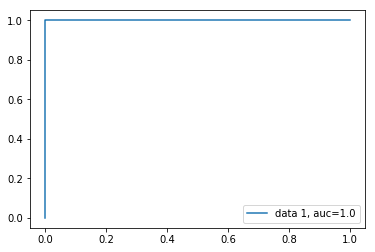

                   Importance
age                  0.358080
bmi                  0.172596
avg_glucose_level    0.126173
id                   0.100470
work_type            0.090065
ever_married         0.080826
heart_disease        0.027492
gender               0.017491
Residence_type       0.013773
hypertension         0.013033


In [66]:
# Realizamos una preduccion con Randown forest, con la importancia de los datos y el ajuste de la curva Roc para ver su tendencia.
ran = RandomForestClassifier(n_estimators=50,random_state=0)
ran.fit(X_train_1,y_train_1)

pred = ran.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

y_pred_proba = ran.predict_proba(X_test_1)[::,1]
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_proba)
auc = roc_auc_score(y_test_1, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


impFeatures = pd.DataFrame((ran.feature_importances_) ,index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

Al igual que el Árbol de decisión, se puede detallar que con el método kfolds y sin kfolds la predicción da muy parecida, tendiendo a 0.9 o superior.

Vemos las caracteristicas de importancia con el random Forest

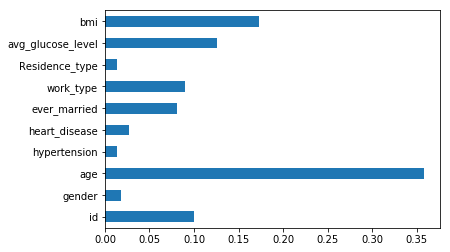

In [67]:
feat_importances = pd.Series(ran.feature_importances_, index=train_data_without_smoke.loc[:,train_data_without_smoke.columns!='stroke'].columns)
feat_importances.plot(kind='barh')

Conclusion

